<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


    Title     : Exploratory Data Analysis Lab
    Author    : Sopianto Djahar
    Email     : idnsopianto@gmail.com
    Linkedin  : https://www.linkedin.com/in/sopiantodjahar/
    GitHub    : github.com/soppdj

## Project Purpose

-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Lab 11. Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


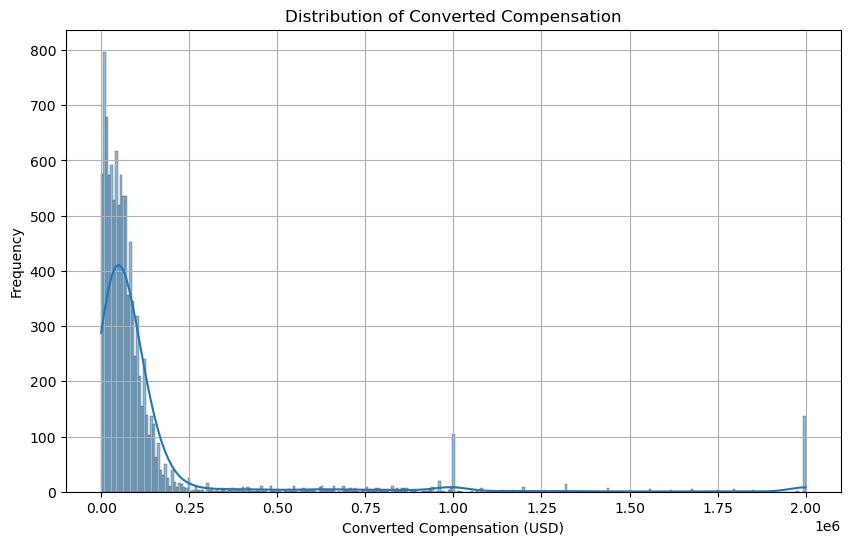

In [4]:
# Filter out rows where 'ConvertedComp' is not null
df_salary = df[df['ConvertedComp'].notnull()]

# Plotting the distribution curve
plt.figure(figsize=(10, 6))
sns.histplot(df_salary['ConvertedComp'], kde=True)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Plot the histogram for the column `ConvertedComp`.


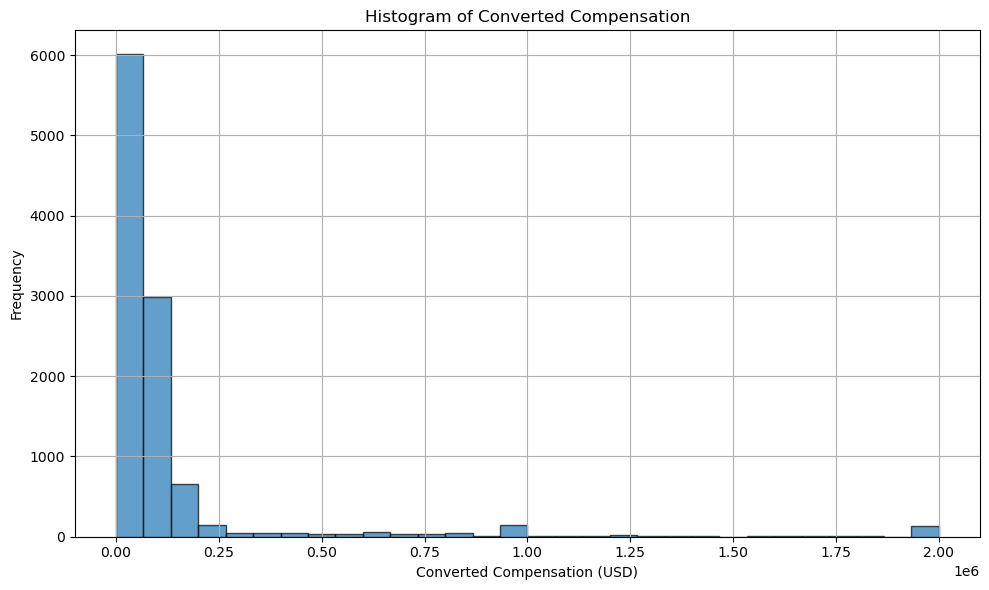

In [5]:
# Filter out rows where 'ConvertedComp' is not null
df_salary = df[df['ConvertedComp'].notnull()]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_salary['ConvertedComp'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# Calculate the median of ConvertedComp
median_salary = df['ConvertedComp'].median()

# Print the median salary
print(f"The median salary (ConvertedComp) is: {median_salary}")

The median salary (ConvertedComp) is: 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# Filter respondents who identified themselves only as a man
only_men = df[df['Gender'] == 'Man']

# Print the number of responders who identified only as a Man
num_only_men = len(only_men)
print(f"Number of responders who identified only as a Man: {num_only_men}")

Number of responders who identified only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# Filter respondents who identified themselves only as a Woman
only_women = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for the filtered subset
median_converted_comp = only_women['ConvertedComp'].median()

# Print the median ConvertedComp for responders identified only as Woman
print(f"Median ConvertedComp for responders identified only as Woman: {median_converted_comp}")

Median ConvertedComp for responders identified only as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# Calculate the five-number summary for the column 'Age'
five_num_summary = df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']]

# Print the five-number summary
print("Five-number summary for Age:")
print(five_num_summary)

Five-number summary for Age:
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


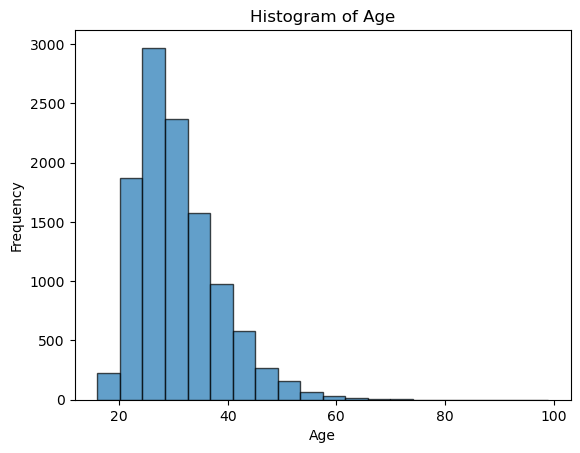

In [14]:
# Load the dataset
df = pd.read_csv("m2_survey_data.csv")

# Drop NaN values from the 'Age' column
age_values = df['Age'].dropna()

# Plot the histogram for the 'Age' column
plt.hist(age_values, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


## Lab 12. Outliers

### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


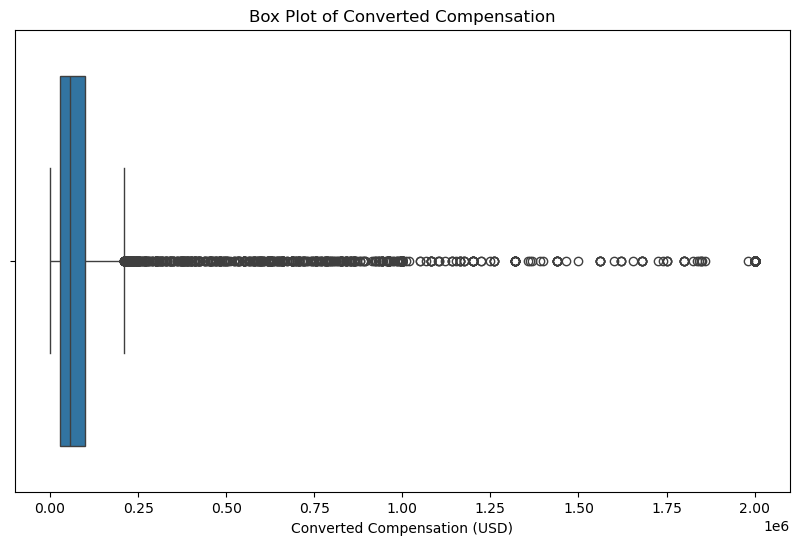

In [15]:
# Drop NaN values from the 'ConvertedComp' column
converted_comp_values = df['ConvertedComp'].dropna()

# Plot the box plot for the 'ConvertedComp' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=converted_comp_values)
plt.xlabel('Converted Compensation (USD)')
plt.title('Box Plot of Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [16]:
# Drop NaN values from the 'ConvertedComp' column
converted_comp_values = df['ConvertedComp'].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = converted_comp_values.quantile(0.25)
q3 = converted_comp_values.quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"Interquartile Range (IQR): {iqr}")

Q1 (25th percentile): 26868.0
Q3 (75th percentile): 100000.0
Interquartile Range (IQR): 73132.0


Find out the upper and lower bounds.


In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = converted_comp_values.quantile(0.25)
q3 = converted_comp_values.quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Calculate the lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [18]:
# Identify outliers
outliers = converted_comp_values[(converted_comp_values < lower_bound) | (converted_comp_values > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print(f"Number of outliers in ConvertedComp: {num_outliers}")

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [19]:
# your code goes here
# Filter the dataframe to remove outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Show the shape of the new dataframe
print(f"Original dataframe shape: {df.shape}")
print(f"New dataframe shape: {df_no_outliers.shape}")

Original dataframe shape: (11398, 85)
New dataframe shape: (9703, 85)


In [20]:
# Optionally, save the new dataframe to a CSV file
df_no_outliers.to_csv("m2_survey_data_no_outliers.csv", index=False)

## Lab 13. Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [22]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Extract the correlation between "Age" and other numerical columns
age_correlations = correlation_matrix["Age"].drop("Age")

# Display the correlations
print(age_correlations)


Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
